<a href="https://colab.research.google.com/github/piotrciechowicz/recipes_with_rating_and_nutrition/blob/main/Recipes_with_Rating_and_Nutrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

#Przygotowanie danych

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/epi_r.csv')
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Wybór zmiennych do analizy

df_2 = df.iloc[:, 1:6]
df_2.head()
df_2.shape

(20052, 5)

In [ ]:
# Sprawdzenie wierszy NaN

df_2.isnull().sum()

rating         0
calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
df_2_clean = imputer.fit_transform(df_2)
df_2_clean = pd.DataFrame(data = df_2_clean, index = df_2.index, columns = df_2.columns)

df_2_clean = df_2_clean[df_2_clean['calories']<1500]
df_2_clean = df_2_clean[df_2_clean['protein']<50]
df_2_clean = df_2_clean[df_2_clean['fat']<75]
df_2_clean = df_2_clean[df_2_clean['sodium']<1500]

data = df_2_clean
y = df_2_clean.iloc[:, [0]]
X = df_2_clean.iloc[:,1:6]
df_2_clean

,rating,calories,protein,fat,sodium
0,2.500,426.0,30.0,2.645751,559.0
1,4.375,403.0,18.0,4.795832,1439.0
2,3.750,165.0,6.0,2.645751,165.0
4,3.125,547.0,20.0,5.656854,452.0
8,4.375,170.0,7.0,3.162278,1272.0
...,...,...,...,...,...
20045,3.750,182.0,1.0,0.000000,3.0
20047,3.125,28.0,2.0,1.414214,64.0
20048,4.375,671.0,22.0,5.291503,583.0
20049,4.375,563.0,31.0,6.164414,652.0


#Analiza danych

In [ ]:
# Zestawienie podstawowych paramtrów statystycznych

df_2_clean.describe()

,rating,calories,protein,fat,sodium
count,13142.000000,13142.000000,13142.000000,13142.000000,13142.000000
mean,3.725698,336.571755,11.025339,17.914625,335.234439
std,1.317082,216.028701,11.965327,15.322161,347.781408
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,180.000000,2.000000,6.000000,58.000000
50%,4.375000,287.000000,6.000000,15.000000,212.000000
75%,4.375000,461.000000,15.000000,26.000000,505.000000
max,5.000000,1492.000000,49.000000,74.000000,1499.000000


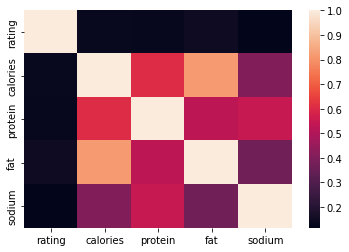

In [ ]:
# Wykres korelacji zmiennych

corr = df_2_clean.corr()
sns.heatmap(np.abs(corr))

# Wniosek: Brak korelacji liniowejzmiennej objaśnianej względem zmiennych objaśniających 

##Hipoteza 1

 Lepszym modelem będzie drzewo decyzyjne

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


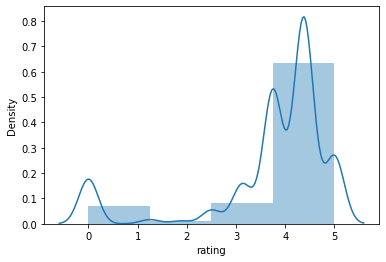

In [ ]:
sns.distplot(df_2_clean.rating, bins =4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


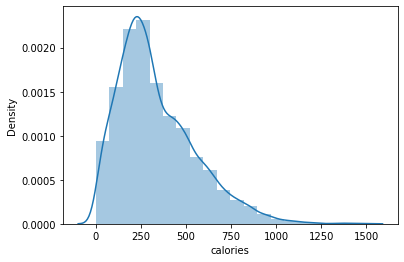

In [ ]:
sns.distplot(df_2_clean.calories, bins =20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


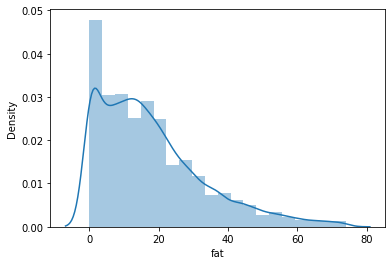

In [ ]:
sns.distplot(df_2_clean.fat, bins =20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


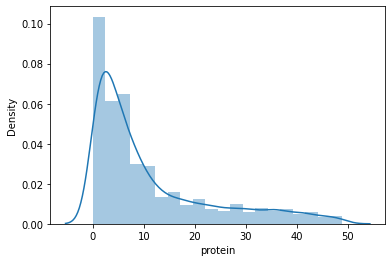

In [ ]:
sns.distplot(df_2_clean.protein, bins =20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


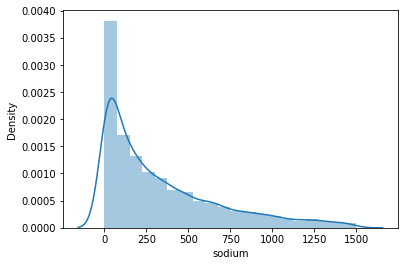

In [ ]:
sns.distplot(df_2_clean.sodium, bins =20)

In [ ]:
df_3 = df_2_clean
df_3['Rate'] = np.round(df_3['rating'])
df_3.head()

,rating,calories,protein,fat,sodium,Rate
0,2.500,426.0,30.0,7.0,559.0,2.0
1,4.375,403.0,18.0,23.0,1439.0,4.0
2,3.750,165.0,6.0,7.0,165.0,4.0
4,3.125,547.0,20.0,32.0,452.0,3.0
8,4.375,170.0,7.0,10.0,1272.0,4.0


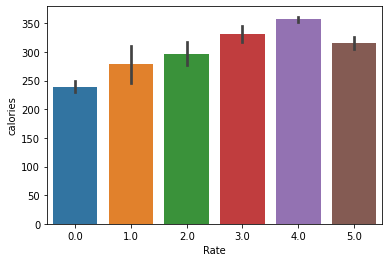

In [ ]:
sns.barplot(x='Rate', y='calories', data=df_3)

#wniosek: wysoka zawartość kalorii wpływa na wysoką ocenę

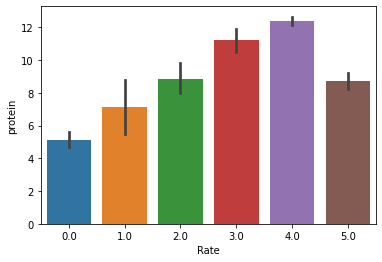

In [ ]:
sns.barplot(x='Rate', y='protein', data=df_3)

#wniosek: wysoka zawartość białka wpływa na wysoką ocenę

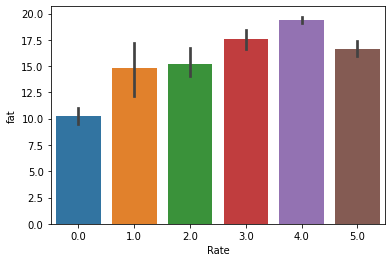

In [ ]:
sns.barplot(x='Rate', y='fat', data=df_3)

#wniosek: wysoka zawartość tłuszczu wpływa na wysoką ocenę, ale nie za duzo

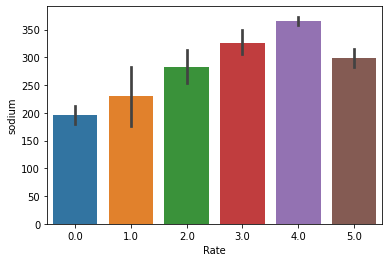

In [ ]:
sns.barplot(x='Rate', y='sodium', data=df_3)

#wniosek: wysoka zawartość sodu wpływa na wysoką ocenę

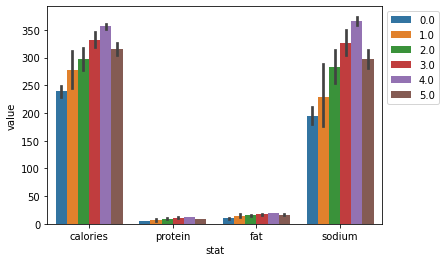

In [ ]:
# Zestawienie zbiorcze

melted_df_3 = pd.melt(df_3, 
                    id_vars = ['rating', 'Rate'], 
                    var_name='stat'
                    )

sns.barplot(x='stat', y='value', data=melted_df_3, hue = 'Rate')
plt.legend(bbox_to_anchor=(1,1), loc=2)

##Hipoteza 2

Im wyższa wartość zmiennych objaśniających tym wyższa ocena

#Model

##Dane

In [ ]:
data.head()

,rating,calories,protein,fat,sodium,Rate
0,2.500,426.0,30.0,7.0,559.0,2.0
1,4.375,403.0,18.0,23.0,1439.0,4.0
2,3.750,165.0,6.0,7.0,165.0,4.0
4,3.125,547.0,20.0,32.0,452.0,3.0
8,4.375,170.0,7.0,10.0,1272.0,4.0


In [ ]:
X.head()

,calories,protein,fat,sodium
0,426.0,30.0,7.0,559.0
1,403.0,18.0,23.0,1439.0
2,165.0,6.0,7.0,165.0
4,547.0,20.0,32.0,452.0
8,170.0,7.0,10.0,1272.0


In [ ]:
y.head()

,rating
0,2.500
1,4.375
2,3.750
4,3.125
8,4.375


##TrainTestSplit

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_train.shape

(9461, 4)

## Standaryzacja

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_sc = scaler.transform(X_train)
X_sc

X_sc_df = pd.DataFrame(data = X_sc,
                           columns = X_train.columns,
                           index = X_train.index)
X_sc_df

,calories,protein,fat,sodium
17320,-0.132410,-0.669646,0.457398,0.185092
16408,-0.492025,-0.336955,-0.515236,0.323596
15073,0.181100,-0.336955,-0.255867,-0.089031
19032,-0.667222,-0.752818,-0.385551,-0.521857
9314,3.025742,-0.087436,3.634669,-0.570911
...,...,...,...,...
15563,0.757405,-0.420127,0.976136,-0.187138
17790,-0.095527,-0.170609,-0.191025,-0.192909
11233,-0.906965,-0.835991,-1.163659,-0.951797
14298,0.319413,-0.087436,-0.644920,0.641001


##Regresja liniowa

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"R_2 score: {lin_reg.score(X_val, y_val)}")
print('\n')
mse_train = mean_squared_error(y_train, lin_reg.predict(X_train), squared=False)
print(f"MSE_train: {mse_train}")
mse_test = mean_squared_error(y_test, lin_reg.predict(X_test), squared=False)
print(f"MSE_test {mse_test}")

R_2 score: 0.02469275746526034


MSE_train: 1.295659632302041
MSE_test 1.311974779150274


##Regresyjne lasy losowe

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

rfr_reg = RandomForestRegressor(n_estimators = 100, 
                                max_depth=10, 
                                min_samples_split = 3, 
                                min_samples_leaf = 1,
                                random_state=42, 
                                oob_score=True)
rfr_reg.fit(X_train, y_train)

print(f"R_2 score: {rfr_reg.score(X_val, y_val)}")
print('\n')
mse_train = mean_squared_error(y_train, rfr_reg.predict(X_train), squared=False)
print(f"MSE_train: {mse_train}")
mse_test = mean_squared_error(y_test, rfr_reg.predict(X_test), squared=False)
print(f"MSE_test {mse_test}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


R_2 score: 0.10491441392088952


MSE_train: 1.0806276524909377
MSE_test 1.2533497215547924


#Wnioski

In [ ]:
#Lepszym modelm jest: Regresyjne lasy losowe
print(f"R_2 score: {rfr_reg.score(X_test, y_test)}")

R_2 score: 0.11033504031306451
